# Experiment

## Introduction

1. Generate a random solvable state and define the goal state.
2. Implement A\* search with the two heuristics.
3. Run 100 random tests for each heuristic.
4. Measure memory usage (expanded nodes) and runtime.
5. Compute mean and standard deviation.




In [12]:
import time
import psutil
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from puzzle.board import Board
from puzzle.solver import Solver
from puzzle.heuristics import manhattan_distance, hamming_distance

## Measure Performance

Measures the performance of solving the 8-puzzle using a specified heuristic.

This function calculates the computation time and memory usage required to solve the puzzle using the given heuristic. It initializes the solver with the provided board and heuristic, executes the solver and then measures the time taken and memory consumed during the process.


In [13]:
def measure_performance(heuristic, board):
    """
    Parameters:
    heuristic (function): The heuristic function to be used (e.g., manhattan_distance, hamming_distance).
    board (Board): The current state of the 8-puzzle board.

    Returns:
    tuple: A tuple containing the computation time (in seconds) and memory usage (in bytes).
    """
    start_time = time.time()
    process = psutil.Process()
    initial_memory = process.memory_info().rss

    solver = Solver(board, heuristic)
    solver.solve()

    end_time = time.time()
    final_memory = process.memory_info().rss

    computation_time = end_time - start_time
    memory_usage = final_memory - initial_memory

    return computation_time, memory_usage

## Run Experiment

The `run_experiment` function performs the following tasks:

1. Initializes a dictionary to store the results for two heuristics: `manhattan_distance` and `hamming_tiles`.
2. Runs 100 iterations where:
   - A random solvable 8-puzzle board is generated.
   - The performance (computation time and memory usage) of solving the puzzle using the `manhattan_distance` heuristic is measured and recorded.
   - The performance (computation time and memory usage) of solving the puzzle using the `hamming_distance` heuristic is measured and recorded.
3. Returns the results as a dictionary containing the recorded times and memory usages for both heuristics.

In [14]:
def run_experiment():
    results = {
        'manhattan_distance': {'time': [], 'memory': []},
        'hamming_distance': {'time': [], 'memory': []}
    }

    for _ in range(100):
        board = Board.generate_random()

        time_md, memory_md = measure_performance(manhattan_distance, board)
        results['manhattan_distance']['time'].append(time_md)
        results['manhattan_distance']['memory'].append(memory_md)

        time_hd, memory_hd = measure_performance(hamming_distance, board)
        results['hamming_distance']['time'].append(time_hd)
        results['hamming_distance']['memory'].append(memory_hd)

    return results

## Summarize Results

The `summarize_results` function calculates the average computation time and memory usage for each heuristic over 100 iterations. It processes the results obtained from the `run_experiment` function and returns a summary dictionary.

In [15]:
def summarize_results(results):
    """
    :param results: dict containing the recorded times and memory usages for both heuristics.
    :return: dict containing the average computation time and memory usage for each heuristic.
    """
    summary = {
        'manhattan_distance': {
            'avg_time': sum(results['manhattan_distance']['time']) / 100,
            'avg_memory': sum(results['manhattan_distance']['memory']) / 100
        },
        'hamming_distance': {
            'avg_time': sum(results['hamming_distance']['time']) / 100,
            'avg_memory': sum(results['hamming_distance']['memory']) / 100
        }
    }
    return summary

## Display Results

The `display_results` function prints a summary table of the average computation time and memory usage for each heuristic. It uses the `tabulate` library to format the table in a grid layout.

In [16]:
def display_results(summary):
    """
    :param summary: dict containing the average computation time and memory usage for each heuristic.
    :return: None
    """
    # Convert time to milliseconds and memory to kilobytes
    summary['manhattan_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['hamming_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['manhattan_distance']['avg_memory'] /= 1024  # bytes to kilobytes
    summary['hamming_distance']['avg_memory'] /= 1024  # bytes to kilobytes

    table = [
        ["Heuristic", "Avg. Computation Time (ms)", "Avg. Memory Usage (KB)"],
        ["Manhattan Distance", summary['manhattan_distance']['avg_time'], summary['manhattan_distance']['avg_memory']],
        ["Hamming Distance", summary['hamming_distance']['avg_time'], summary['hamming_distance']['avg_memory']]
    ]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

## Visualize Results

The `visualize_results` function creates a visual comparison of the average computation time and memory usage for each heuristic. It uses the matplotlib library to generate a bar chart and a line plot on the same figure.

In [17]:
def visualize_results(summary):
    """
    :param summary: dict containing the average computation time and memory usage for each heuristic.
    :return: None
    """
    heuristics = ["Manhattan Distance", "Misplaced Tiles"]
    avg_times = [summary['manhattan_distance']['avg_time'], summary['hamming_distance']['avg_time']]
    avg_memory = [summary['manhattan_distance']['avg_memory'], summary['hamming_distance']['avg_memory']]

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Heuristic')
    ax1.set_ylabel('Avg. Computation Time (s)', color=color)
    ax1.bar(heuristics, avg_times, color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Avg. Memory Usage (bytes)', color=color)
    ax2.plot(heuristics, avg_memory, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Heuristic Performance Comparison')
    plt.show()

+--------------------+------------------------------+--------------------------+
| Heuristic          |   Avg. Computation Time (ms) |   Avg. Memory Usage (KB) |
+====================+==============================+==========================+
| Manhattan Distance |                      10.2248 |                  -181.92 |
+--------------------+------------------------------+--------------------------+
| Hamming Distance   |                     165.293  |                   171.36 |
+--------------------+------------------------------+--------------------------+


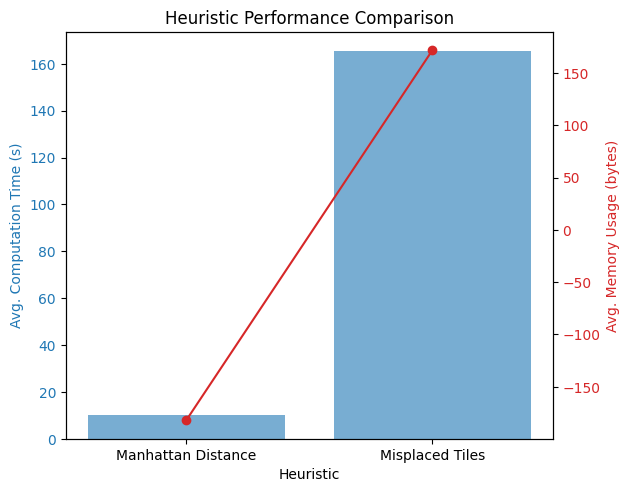

In [18]:
results = run_experiment()
summary = summarize_results(results)
display_results(summary)
visualize_results(summary)
#print_all_results(results)